In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

#parameters for NGC 5533
gamma = 0.2
h = 8.9                                                     #radial scale-length (kpc)
R = 4*h                                                     #cut-off radius (kpc)
#v0h = 180                                                  #equilibrium velocity?
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
mdm = 1                                                     #mass of dark matter particle
kb = 1.38e-23                                               #Boltzmann constant (m2 kg s-2 K-1)
T = 1                                                       #temperature ("velocity dispersion of stars")
#A = (kb*T)/(2*np.pi*G*mdm)
A = 1

#equations
rhat = lambda r,z: np.sqrt((r**2)+(z**2))

rho = lambda r: A/(r**2)                                    #isothermal density profile
v0h = lambda r,z,G: np.sqrt(rho(r)*4*np.pi*G*(rhat(r,z)**2))
vh = lambda r,z,G,R,gamma: v0h(r,z,G)*((r/R)**gamma)        #halo velocity from Casertano's paper
#vh = lambda r,z,G: v0h(r,z,G)

print(A)
print(vh(0.001,0,R,G,gamma))

1
62.89791363932347


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


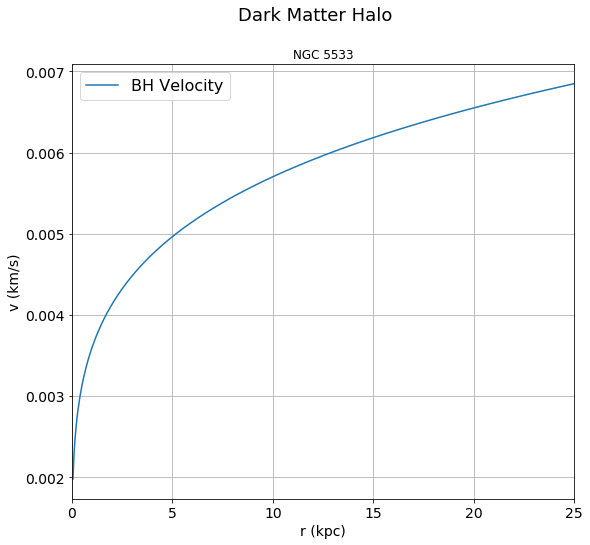

In [2]:
#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0, 25, 500)

plt.plot(r, vh(r,0,G,R,gamma), linestyle='solid', label='BH Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,25)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DMVelocity.png')
plt.show()